## 1. Load Dataset and Initial Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# Inspect first few rows
print(df.head())

# Drop unnecessary columns
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

# Check data types
print(df.dtypes)

# Convert 'Date' and 'Time' columns to proper formats
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce').dt.time


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

* _**Loading the dataset**_: I loaded the Air Quality dataset using pandas. The dataset is separated by semicolons `;` and uses commas `,` as the decimal point, so I specified these when loading the file.

* _**Dropping unnecessary columns**_: Columns Unnamed: 15 and Unnamed: 16 are dropped since they contain no useful data.

* _**Datetime conversion**_: I converted the Date and Time columns into proper datetime formats to allow for time-based analysis later.

## 2. Handling Missing Data

In [5]:
# Fill missing numeric values with the mean of each column
numeric_cols = df.select_dtypes(include=[np.number]).columns 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check for remaining missing values
print(df.isnull().sum())

Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64


* _**Handling missing values**_: For the numeric columns, missing values are filled with the mean of their respective columns to ensure the dataset remains consistent for analysis.

* _**Verifying missing values**_: After filling, I checked if there are any missing values left in the dataset.

## 3. Exploratory Data Analysis (EDA)
### 3.1 Distribution of Key Pollutants

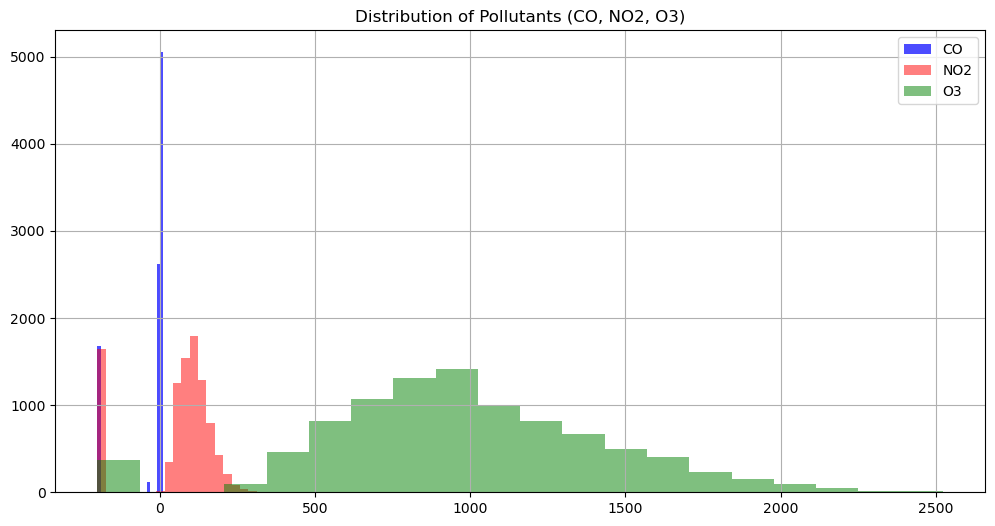

In [8]:
# Plot histograms for CO, NO2, and O3
plt.figure(figsize=(12, 6))
df['CO(GT)'].hist(bins=20, color='blue', alpha=0.7, label='CO')
df['NO2(GT)'].hist(bins=20, color='red', alpha=0.5, label='NO2')
df['PT08.S5(O3)'].hist(bins=20, color='green', alpha=0.5, label='O3')
plt.title('Distribution of Pollutants (CO, NO2, O3)')
plt.legend()
plt.show()

* _**Pollutant distribution**_: The histograms show the distribution of three key pollutants: Carbon Monoxide (CO), Nitrogen Dioxide (NO2), and Ozone (O3). This gives an overview of how concentrations of these pollutants vary across the dataset.

### 3.2 Box Plot for Ozone (O3) Levels

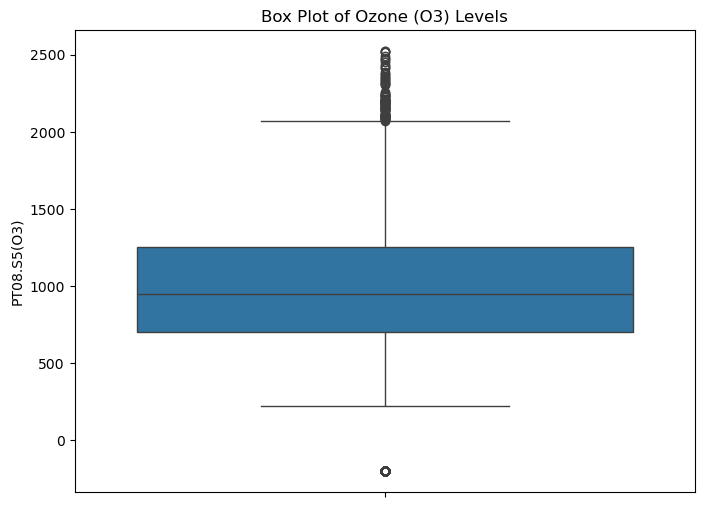

In [11]:
# Boxplot for Ozone levels
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['PT08.S5(O3)'])
plt.title('Box Plot of Ozone (O3) Levels')
plt.show()

* _**Boxplot analysis**_: The box plot for Ozone (O3) levels helps identify outliers and the general spread of the Ozone concentrations in the dataset.

### 3.3 Correlation Matrix Between Pollutants

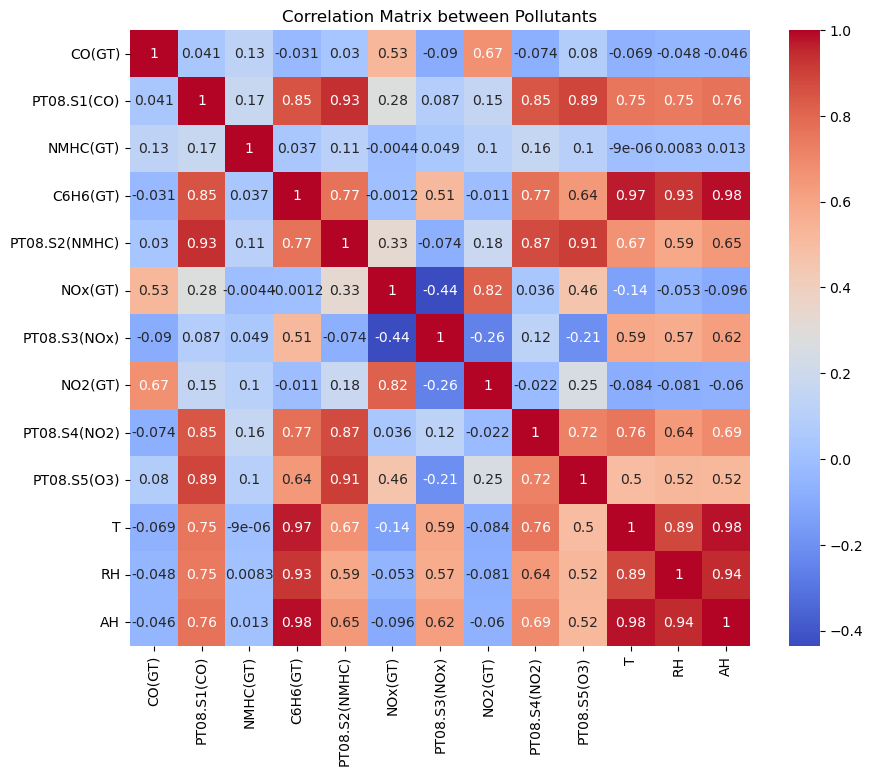

In [14]:
# Correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Pollutants')
plt.show()

* _**Correlation analysis**_: The heatmap shows the correlation between various pollutants and sensor measurements in the dataset. This can help identify relationships or dependencies between the features that could be useful for model building later.

### 3.4 Scatter Plot Between NO2 and CO Levels

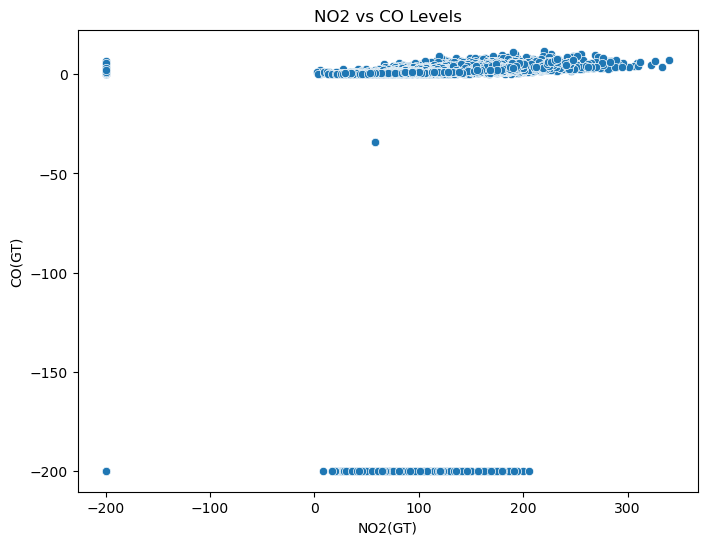

In [17]:
# Scatter plot between NO2 and CO
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['NO2(GT)'], y=df['CO(GT)'])
plt.title('NO2 vs CO Levels')
plt.show()

* _**Scatter plot**_: This plot visualizes the relationship between Nitrogen Dioxide (NO2) and Carbon Monoxide (CO) levels. It helps to identify any patterns or trends between these two pollutants, such as a linear relationship or clusters.